In [ ]:
# KUC, NLP
# load sms-spam, using truncated SVD

1. Load data

In [5]:
# import sms-spam.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sms = pd.read_csv('sms-spam.csv',usecols= ['spam','text'])
print(sms.head())

index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]  # <2>
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)
mask = sms.spam.astype(bool).values
sms['spam'] = sms.spam.astype(int)


print(sms.head())

   spam                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...
       spam                                               text
sms0      0  Go until jurong point, crazy.. Available only ...
sms1      0                      Ok lar... Joking wif u oni...
sms2!     1  Free entry in 2 a wkly comp to win FA Cup fina...
sms3      0  U dun say so early hor... U c already then say...
sms4      0  Nah I don't think he goes to usf, he lives aro...


2. generate TF-IDF vectors

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
print(tfidf_docs.shape)



/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(4837, 9232)


In [7]:
# LSA: truncated SVD
import pandas as pd
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=16, n_iter=100)
print(tfidf_docs.shape)
svd_topic_vectors = svd.fit_transform(tfidf_docs)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors)
svd_topic_vectors.round(3).head(16)


(4837, 9232)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.117,0.197,0.001,0.047,0.030,0.023,-0.056,0.067,-0.079,-0.070,-0.018,-0.003,0.008,0.005,-0.036,-0.045
1,0.111,0.421,-0.089,0.001,0.005,-0.096,0.052,0.034,0.046,0.016,-0.032,-0.017,-0.035,0.043,-0.023,0.071
2,0.116,-0.047,-0.053,0.019,0.102,-0.074,-0.045,0.010,0.021,-0.027,0.141,-0.042,-0.024,0.029,-0.013,-0.068
3,0.136,0.343,-0.030,-0.003,0.120,-0.011,0.034,-0.119,-0.100,-0.033,-0.069,-0.081,-0.029,0.078,-0.037,0.073
4,0.118,-0.002,0.029,0.049,-0.027,0.068,-0.097,-0.043,0.080,0.006,0.020,-0.044,0.001,0.031,0.054,-0.029
5,0.228,0.003,0.058,0.022,0.080,-0.106,-0.042,0.046,0.160,0.047,0.066,0.015,-0.049,-0.044,0.068,-0.021
6,0.203,-0.046,-0.096,-0.052,0.005,0.038,0.031,-0.012,-0.015,-0.066,0.003,-0.110,-0.029,-0.088,0.079,0.041
7,0.100,-0.040,-0.025,-0.001,0.034,-0.057,-0.044,0.024,-0.006,0.008,0.046,0.014,0.134,-0.024,0.076,0.052
8,0.227,-0.129,-0.094,0.023,0.106,-0.258,-0.047,0.039,-0.061,0.129,-0.009,0.004,-0.047,0.047,-0.064,-0.080
9,0.181,-0.044,0.033,0.047,0.174,-0.120,-0.027,-0.020,0.021,0.043,0.161,0.063,0.067,-0.077,-0.042,0.164


In [8]:
print(svd_topic_vectors[:10])

         0         1         2         3         4         5         6   \
0  0.117168  0.197241  0.001291  0.046938  0.029898  0.023255 -0.055717   
1  0.111082  0.420921 -0.088945  0.001267  0.005467 -0.095879  0.051561   
2  0.116148 -0.047167 -0.052929  0.018714  0.101805 -0.074445 -0.045453   
3  0.136377  0.342812 -0.030319 -0.003396  0.120083 -0.010570  0.033826   
4  0.117986 -0.001852  0.029035  0.048743 -0.027100  0.067796 -0.097089   
5  0.228202  0.002892  0.058029  0.022164  0.079508 -0.106255 -0.042088   
6  0.202734 -0.045766 -0.096475 -0.052489  0.005272  0.037623  0.031309   
7  0.099892 -0.040124 -0.024750 -0.000919  0.033775 -0.057019 -0.043642   
8  0.227383 -0.128681 -0.094169  0.022747  0.105722 -0.257947 -0.047180   
9  0.180533 -0.044485  0.033247  0.046597  0.174143 -0.119964 -0.027006   

         7         8         9         10        11        12        13  \
0  0.066620 -0.079180 -0.070192 -0.018184 -0.002791  0.007905  0.004756   
1  0.034003  0.046031  0

In [9]:
def truncated_svd_elbow(n_components, words_cooc_matrix, print_elbow = True):
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
    svd.fit(words_cooc_matrix)  
    #print(svd.explained_variance_ratio_) 
    
    if(print_elbow):
        plt.plot(np.arange(0,n_components), svd.explained_variance_ratio_)    
        #for xy in zip(np.arange(0,top_n-1), np.round(svd.explained_variance_ratio_,3)):    
        #    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')    
        plt.xlabel('n_components')
        plt.ylabel('explained_variance_ratio_')
        title = "elbow for truncated svd with n_components " + str(n_components)
        plt.title(title)
        plt.show()
    
    U = svd.transform(words_cooc_matrix)  
    Sigma = svd.singular_values_
    VT = svd.components_
    return U,Sigma,VT

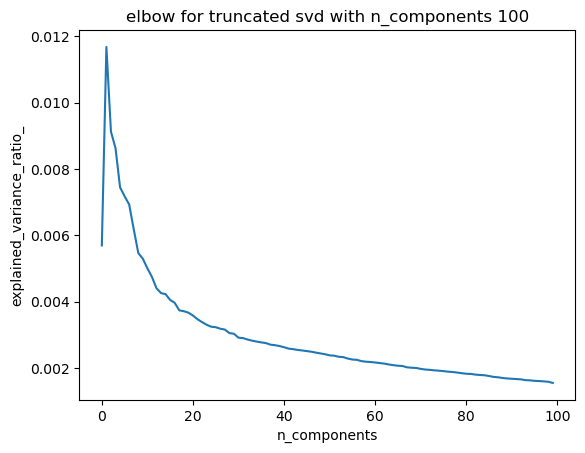

In [10]:
# get the elbow for truncated SVD
U,Sigma,VT = truncated_svd_elbow(100, tfidf_docs, print_elbow = True)
